In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def showImg(img, title = ''):
    plt.figure(figsize = (20,15));
    plt.title(title)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

def showGrayScaleImg(img, title = ''):
    plt.figure(figsize = (20,15));
    plt.title(title)
    plt.imshow(img, cmap='gray')


In [18]:
pts = np.array([[80,550],[480,300],[1000,550]], np.int32)

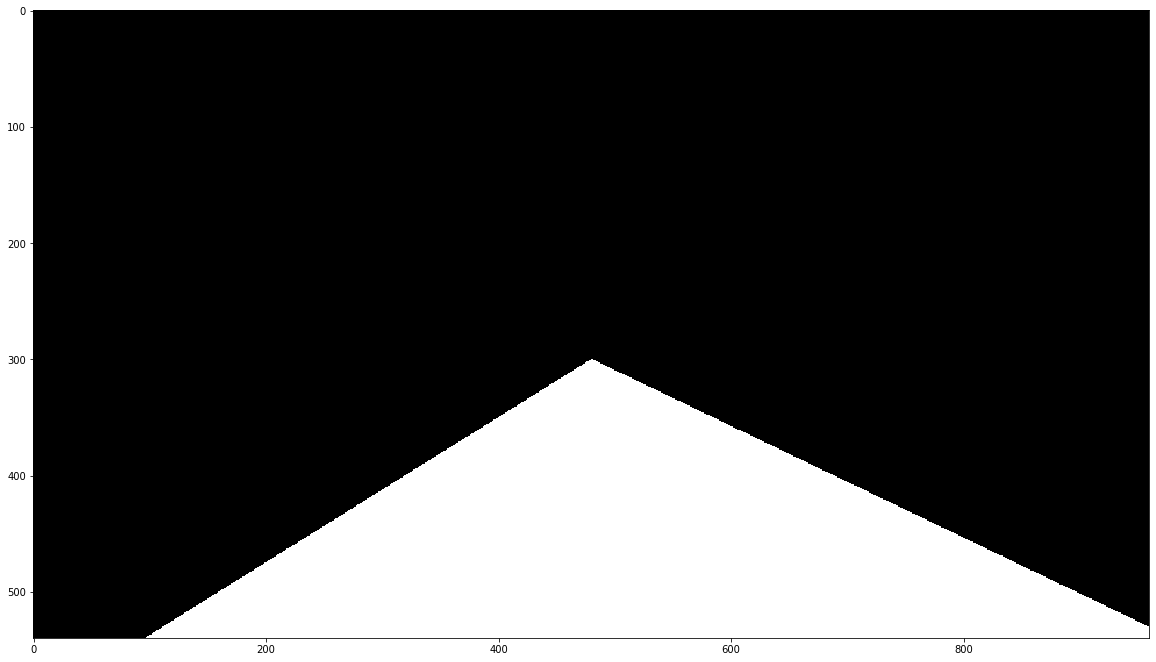

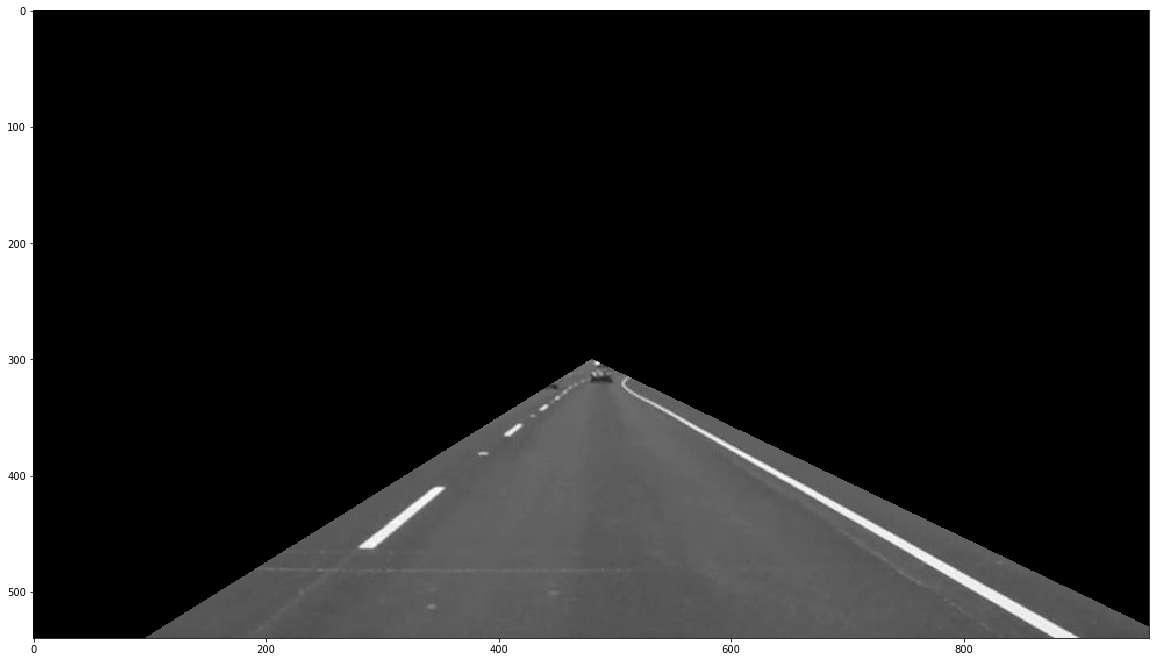

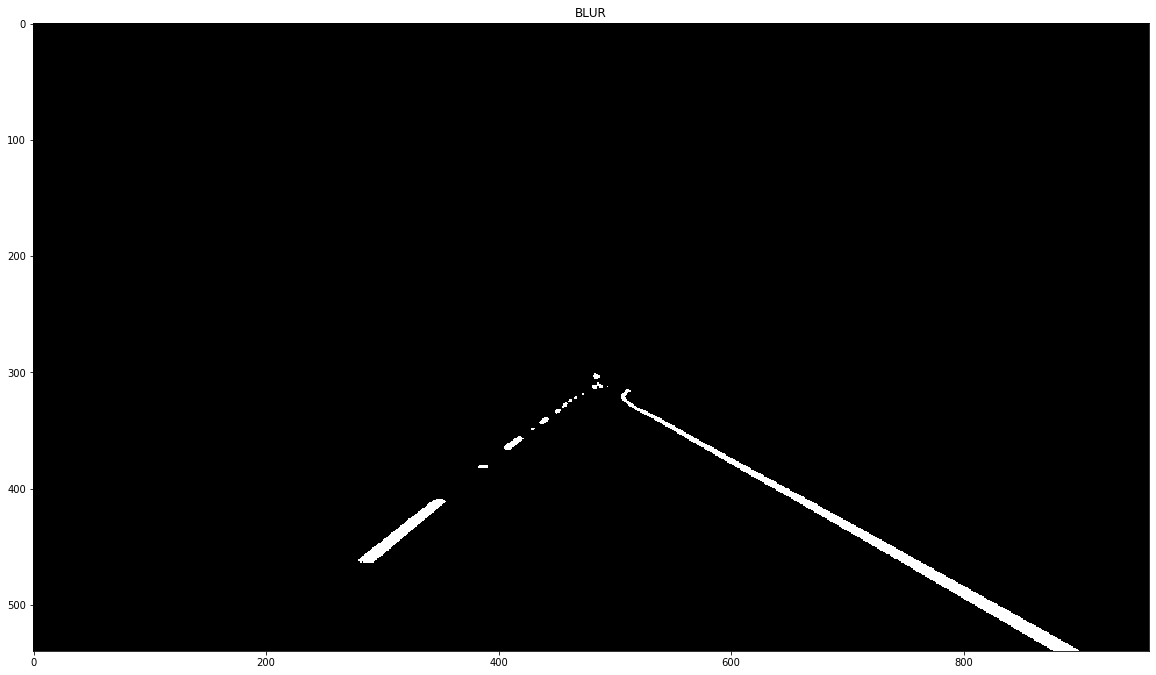

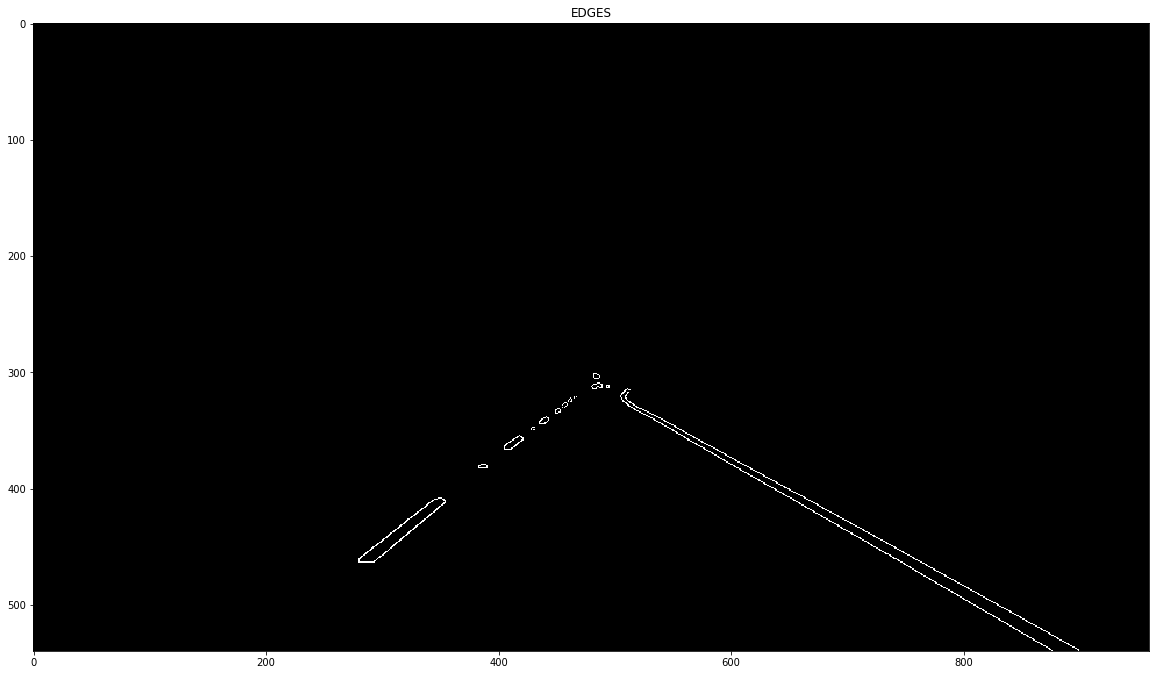

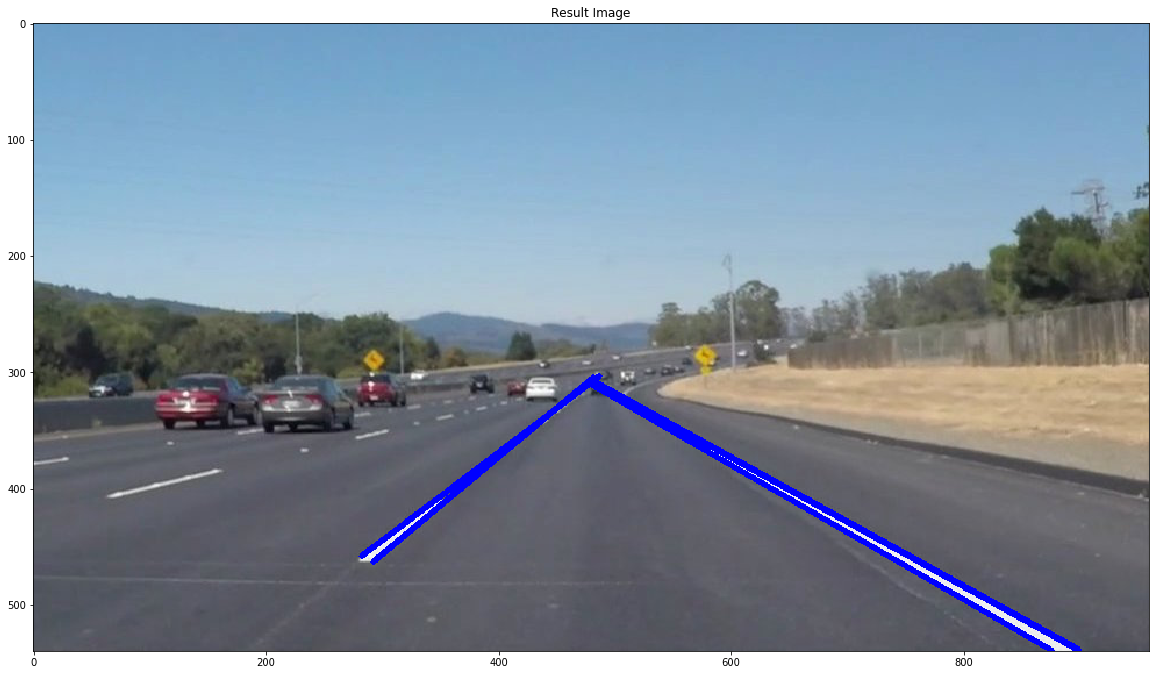

In [20]:
# Read image 
img = cv2.imread('Videos/test_images/solidWhiteCurve.jpg')


# Convert the image to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

canvas = np.zeros((gray.shape[0],gray.shape[1]), np.uint8)

#pts = np.array([[80,550],[500,300],[1000,550]], np.int32)
#triangle = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_copy = gray.copy()

ignore_mask_color = 255

triangle = cv2.fillPoly(canvas, [pts], ignore_mask_color)
#showGrayScaleImg(triangle)

and_operation = cv2.bitwise_and(triangle, gray)

showGrayScaleImg(and_operation)

# Find the edges in the image using canny detector
#blur = cv2.GaussianBlur(and_operation,(7,7),-1)
ret,thresh = cv2.threshold(and_operation,127,255,cv2.THRESH_BINARY)

showGrayScaleImg(thresh, "BLUR")

edges = cv2.Canny(thresh, 200, 255)
# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, minLineLength=100, maxLineGap=250)
# Draw lines on the image
for line in lines[:5]:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
# Show result
showGrayScaleImg(edges, "EDGES")
showImg(img, "Result Image")



In [21]:
cap = cv2.VideoCapture("Videos/solidWhiteRight.mp4")
#cap = cv2.VideoCapture("Videos/solidYellowLeft.mp4")

while(True):
    #capture frame-by-frame
    ret, frame = cap.read()
    # Convert the image to gray-scale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    canvas = np.zeros((gray.shape[0],gray.shape[1]), np.uint8)

    #pts = np.array([[80,550],[500,300],[1000,550]], np.int32)
    #triangle = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ignore_mask_color = 255

    triangle = cv2.fillPoly(canvas, [pts], ignore_mask_color)

    and_operation = cv2.bitwise_and(triangle, gray)

    ret,thresh = cv2.threshold(and_operation,127,255,cv2.THRESH_BINARY)

    edges = cv2.Canny(thresh, 200, 255)
    # Detect points that form a line
    
    overlay = frame.copy()
   
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, minLineLength=80, maxLineGap=200)
    # Draw lines on the image
    for line in lines[:5]:
        x1, y1, x2, y2 = line[0]
        cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 6)
    
    opacity = 0.4
    cv2.addWeighted(overlay, opacity, frame, 1-opacity, 0, frame)


    frame = frame.astype('uint8')

    #Display the resulting frame
    cv2.imshow('Video, press \'q\' to close', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'
